https://colab.research.google.com/drive/1W3vRPi2xbHgxF4r6c4UJa1MVwUe4C9X1?fbclid=IwAR2NScHzLzEey55KYsUe99ezuVlpuLjq5YLb0ARsGqkvN28PyXLn9hhRt4o#scrollTo=IzzD0MoAGyVo

In [32]:
import requests
import numpy as np
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt

In [52]:
from scipy.optimize import curve_fit,minimize
from scipy import stats,integrate,optimize

In [7]:
url_api = 'https://covid19.th-stat.com/api/open/timeline'
req=requests.get(url_api)
daily_case_report_list  = json.loads(req.content.decode('utf8').replace("'", '"'))['Data'] # convert byte array to list of json
daily_case_report = pd.DataFrame(data=daily_case_report_list)

In [11]:
daily_case_report.head(50)

,Date,NewConfirmed,NewRecovered,NewHospitalized,NewDeaths,Confirmed,Recovered,Hospitalized,Deaths
0,01/01/2020,0,0,0,0,0,0,0,0
1,01/02/2020,0,0,0,0,0,0,0,0
2,01/03/2020,0,0,0,0,0,0,0,0
3,01/04/2020,0,0,0,0,0,0,0,0
4,01/05/2020,0,0,0,0,0,0,0,0
5,01/06/2020,0,0,0,0,0,0,0,0
6,01/07/2020,0,0,0,0,0,0,0,0
7,01/08/2020,0,0,0,0,0,0,0,0
8,01/09/2020,0,0,0,0,0,0,0,0
9,01/10/2020,0,0,0,0,0,0,0,0


In [12]:
df = daily_case_report.copy()

In [14]:
type(df['Date'][0])

str

In [26]:
df['Date']  = pd.to_datetime(df['Date'], format='%m/%d/%Y')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             245 non-null    datetime64[ns]
 1   NewConfirmed     245 non-null    int64         
 2   NewRecovered     245 non-null    int64         
 3   NewHospitalized  245 non-null    int64         
 4   NewDeaths        245 non-null    int64         
 5   Confirmed        245 non-null    int64         
 6   Recovered        245 non-null    int64         
 7   Hospitalized     245 non-null    int64         
 8   Deaths           245 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 17.4 KB
None


In [27]:
df.set_index('Date', inplace=True)
df

,NewConfirmed,NewRecovered,NewHospitalized,NewDeaths,Confirmed,Recovered,Hospitalized,Deaths
Date,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2020-08-28,6,0,6,0,3410,3237,115,58
2020-08-29,1,5,-4,0,3411,3242,111,58
2020-08-30,0,10,-10,0,3411,3252,101,58


In [40]:
df.head(10)

,NewConfirmed,NewRecovered,NewHospitalized,NewDeaths,Confirmed,Recovered,Hospitalized,Deaths
Date,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0
2020-01-06,0,0,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0
2020-01-08,0,0,0,0,0,0,0,0
2020-01-09,0,0,0,0,0,0,0,0


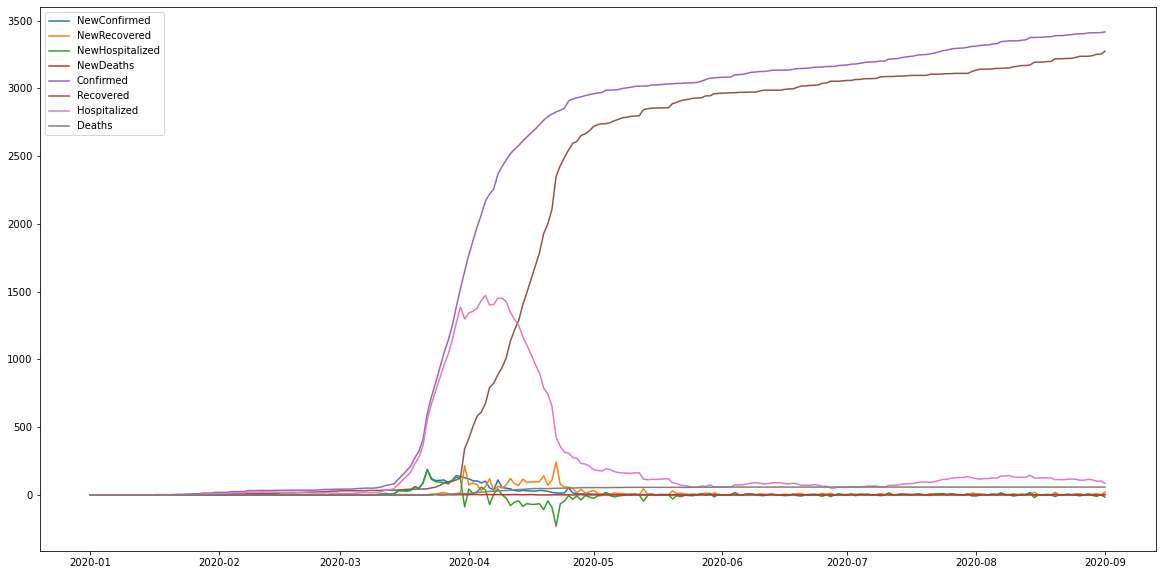

In [44]:
plt.figure(figsize=(20,10))
plt.plot(df['NewConfirmed'], label="NewConfirmed")
plt.plot(df['NewRecovered'], label='NewRecovered')
plt.plot(df['NewHospitalized'], label='NewHospitalized')
plt.plot(df['NewDeaths'], label='NewDeaths')
plt.plot(df['Confirmed'], label='Confirmed')
plt.plot(df['Recovered'], label='Recovered')
plt.plot(df['Hospitalized'], label='Hospitalized')
plt.plot(df['Deaths'], label='Deaths')
plt.legend(loc="upper left")
plt.show()

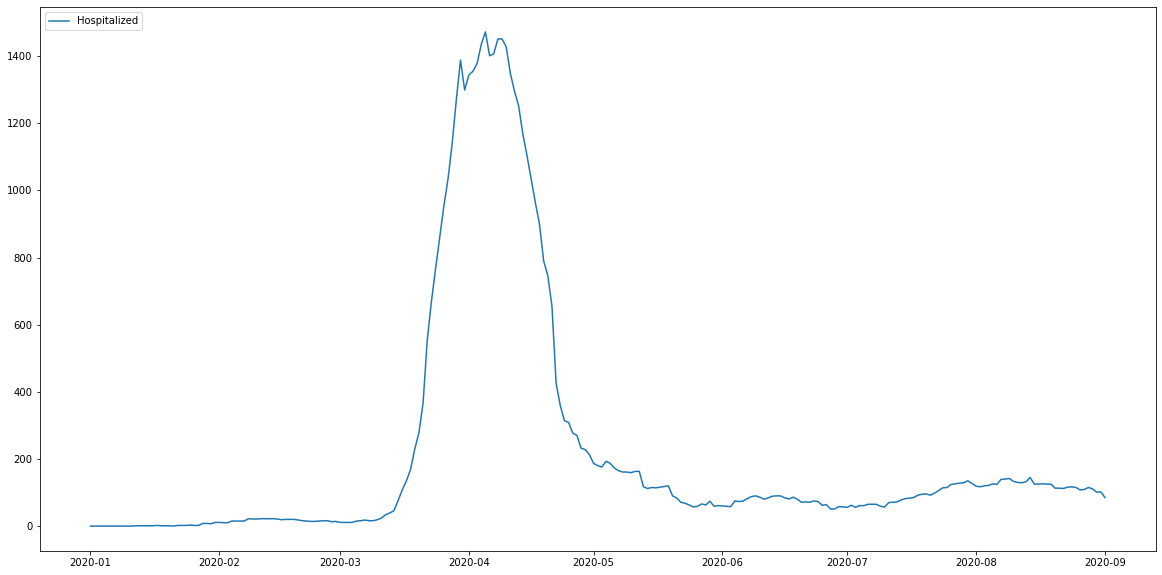

In [45]:
plt.figure(figsize=(20,10))
# plt.plot(df['NewConfirmed'], label="NewConfirmed")
# plt.plot(df['NewRecovered'], label='NewRecovered')
# plt.plot(df['NewHospitalized'], label='NewHospitalized')
# plt.plot(df['NewDeaths'], label='NewDeaths')
# plt.plot(df['Confirmed'], label='Confirmed')
# plt.plot(df['Recovered'], label='Recovered')
plt.plot(df['Hospitalized'], label='Hospitalized')
# plt.plot(df['Deaths'], label='Deaths')
plt.legend(loc="upper left")
plt.show()

In [46]:
def mse(param, data):
    beta, gamma = param
    t = np.arange(0, len(data))
    # fit only I group
    y_pred = integrate.odeint(SIR_model_freq, [S0, I0, R0], t, args=(beta, gamma))[:,1]
    rmse = np.mean((y_pred - data)**2)
    return (rmse)

def sum_negative_log_likelihood_poisson(param, data):
    beta, gamma = param
    t = np.arange(0,len(data))
    # fit only I group
    y_pred = integrate.odeint(SIR_model_freq, [S0, I0, R0], t, args=(beta, gamma))[:,1]
    neg_log_likelihood = -np.sum(stats.poisson.logpmf(data, mu=y_pred))
    return (neg_log_likelihood)

In [47]:
daily_active_case = daily_case_report['Hospitalized']

In [54]:
def SIR_model_freq(y,t,beta,gamma):
  S = y[0]
  I = y[1]
  R = y[2]
  N = S + I + R
  dS_dt = -beta *S * I / (N)  
  dI_dt = beta * S * I / (N)  - gamma*I
  dR_dt = gamma * I
  return ([dS_dt,dI_dt,dR_dt])

beta = 0.4061652361567833
gamma = 0.2675910356291073
R0 = 1.5178581569516618


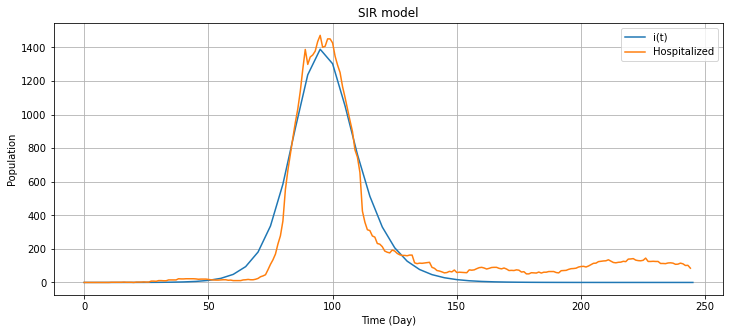

In [208]:
S0 = 21000
I0 = .012
R0 = 0
# n_train = 200
n_train = len(df)
x_train = np.arange(0,daily_active_case[:n_train].shape[0])
# print(x_train)
y_train = daily_active_case[:n_train].to_numpy()
initial_param = [1,1] #init beta and gamma
lse = minimize(mse,
    initial_param,args=(y_train),#method='Nelder-Mead'
    method='L-BFGS-B',bounds=[(0.0001, 5), (0.00001, 10)])
beta, gamma = lse.x
print('beta = '+str(beta))
print('gamma = '+str(gamma))
print('R0 = '+str(beta/gamma))

#Time vector
# t= np.linspace(0,100)
t= np.linspace(0,len(df))

#Result
solution = integrate.odeint(SIR_model_freq,[S0,I0,R0],t,args=(beta,gamma))
solution = np.array(solution)

#plot
plt.figure(figsize=(12,5))
# plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
# plt.plot(t,solution[:,2],label ="r(t)")
# plt.plot(x_train, y_train, 'o',color='grey',markersize = 3,label='actual active cases')
plt.plot(x_train, y_train, label='Hospitalized')
# plt.plot(t,df['Recovered'], label='Recovered')
plt.grid()
plt.legend()
plt.xlabel("Time (Day)")
plt.ylabel("Population")
plt.title("SIR model")
plt.show()

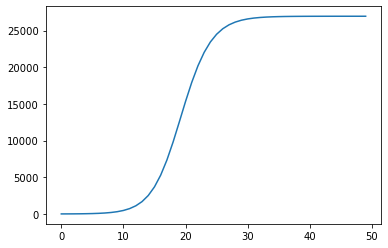

In [105]:
plt.plot(solution[:,2])

In [113]:
len(df['Recovered'])

245

In [124]:
len(df['Recovered'].to_numpy())

245

In [115]:
t= np.linspace(0,len(df))

In [122]:
n_train

246

beta = 0.2676135075826865 gamma = 0.13335875259697502
R0 = 2.0067187370254147


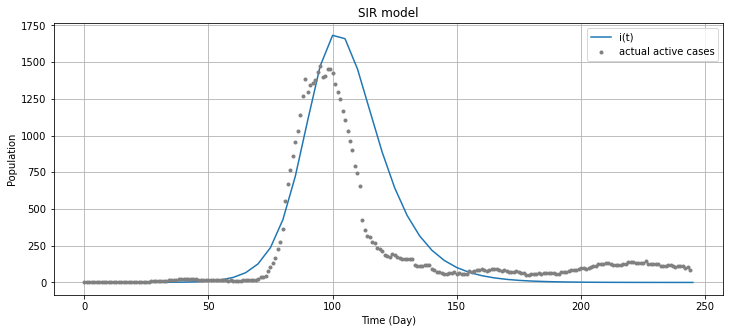

In [228]:
S0 = 11000
I0 = .010
R0 = 0
# n_train = 100
n_train = len(df)
x_train = np.arange(0,daily_active_case[:n_train].shape[0])
y_train = daily_active_case[:n_train].to_numpy()
initial_param = [0.1,0.1] #init beta and gamma
mle = minimize(sum_negative_log_likelihood_poisson,
    initial_param,args=(y_train),#method='Nelder-Mead'
    method='L-BFGS-B',bounds=[(0.000001, 5), (0.00001, 5)])
beta, gamma = mle.x
print('beta = '+str(beta)+ ' gamma = '+str(gamma))
print('R0 = '+str(beta/gamma))

#Time vector
# t= np.linspace(0,150)
t= np.linspace(0,len(df))

#Result
solution = integrate.odeint(SIR_model_freq,[S0,I0,R0],t,args=(beta,gamma))
solution = np.array(solution)

#plot
plt.figure(figsize=(12,5))
# plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
# plt.plot(t,solution[:,2],label ="r(t)")
plt.plot(x_train, y_train, 'o',color='grey',markersize = 3,label='actual active cases')
# plt.plot(t, y_train, 'o',color='grey',markersize = 3,label='actual active cases')
plt.grid()
plt.legend()
plt.xlabel("Time (Day)")
plt.ylabel("Population")
plt.title("SIR model")
plt.show()